In [66]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [67]:
# load and classify dataset
df=pd.read_excel('Proj2DataSet.xlsx',header=None)
df=df.set_axis(['x1', 'x2', 'class'], axis='columns')
c1=df.where(df['class']==1).dropna()[['x1','x2']].values
c2=df.where(df['class']==-1).dropna()[['x1','x2']].values
X=df[['x1','x2']].values
y=df[['class']].values


In [68]:

Xy = y * X
K = np.zeros((X.shape[0],X.shape[0]))
gamma=(-1/(2*(1.75**2)))

for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        K[i,j]=np.exp(gamma* (np.linalg.norm(X[i]-X[j])**2))



In [69]:
C = 100
m,n = X.shape
Xy = y * X


P = cvxopt_matrix(np.outer(y,y)*K)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.T*1.0)
b = cvxopt_matrix(np.zeros(1))


In [80]:
sol = cvxopt_solvers.qp(P, q, G, h, A, b)

lambdas = np.array(sol['x'])

     pcost       dcost       gap    pres   dres
 0:  1.5094e+04 -2.1028e+05  3e+05  8e-02  6e-14
 1:  4.8365e+03 -2.4550e+04  3e+04  6e-03  7e-14
 2:  2.3820e+02 -5.0039e+03  5e+03  6e-04  7e-14
 3: -5.9821e+02 -2.0467e+03  1e+03  1e-04  7e-14
 4: -8.6095e+02 -1.8067e+03  9e+02  6e-05  7e-14
 5: -1.0436e+03 -1.3231e+03  3e+02  1e-05  7e-14
 6: -1.0872e+03 -1.2571e+03  2e+02  6e-06  6e-14
 7: -1.1429e+03 -1.1786e+03  4e+01  1e-14  1e-13
 8: -1.1539e+03 -1.1616e+03  8e+00  5e-14  9e-14
 9: -1.1568e+03 -1.1570e+03  2e-01  2e-14  8e-14
10: -1.1569e+03 -1.1569e+03  2e-02  2e-14  1e-13
11: -1.1569e+03 -1.1569e+03  2e-04  9e-14  9e-14
Optimal solution found.


(100, 1)

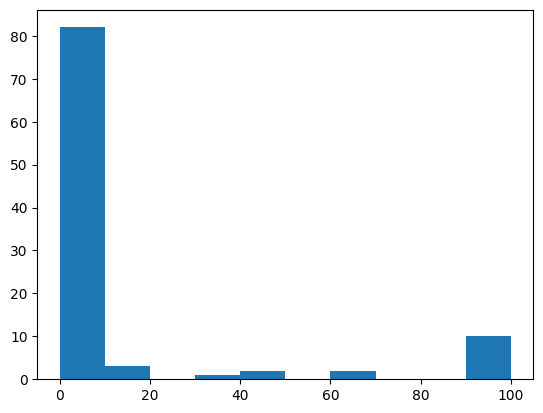

In [71]:
plt.hist(lambdas)
plt.show()

In [72]:
# w = np.matmul((y * lambdas).T,X).reshape(-1,1)

# find w for kernels

Sv = ((lambdas>0.09999) ).flatten()
w0 = np.mean(y[Sv] - np.dot(X[Sv], w))

In [73]:
misclassed1=(np.dot(c1,w)+w0<0)
misclassed2=(np.dot(c2,w)+w0>=0)
misclassed=np.concatenate([misclassed1,misclassed2])

In [74]:
print(w.T,w0)

[[-22.7741678   22.90135145]] -0.09136213564667696


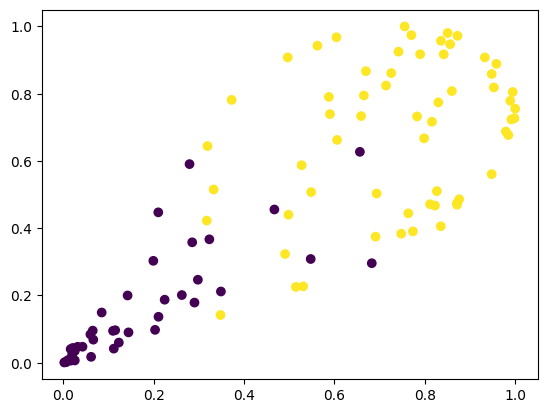

In [76]:
plt.scatter(K[:,0],K[:,1],c=y)

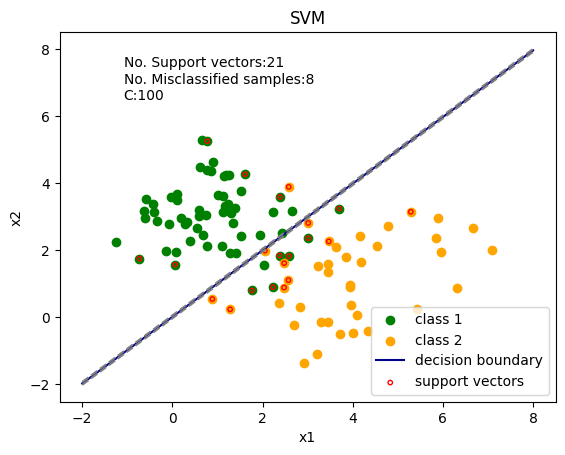

In [77]:

plt.scatter(x=c1.T[0],y=c1.T[1],c='green',label='class 1')
plt.scatter(x=c2.T[0],y=c2.T[1],c='orange',label='class 2')

x1 = np.linspace(-2,8)
plt.plot(x1, -(x1*w[0] +w0)/w[1], color = 'darkblue',label='decision boundary')
plt.plot(x1, -(x1*w[0] +w0 -1)/w[1], color = 'grey',linestyle='--')
plt.plot(x1, -(x1*w[0] +w0 +1)/w[1], color = 'grey',linestyle='--')
plt.scatter(X[Sv].T[0], X[Sv].T[1], s=10, facecolors='none', edgecolors='r',label='support vectors')


plt.annotate(f'No. Support vectors:{len(X[Sv])} \nNo. Misclassified samples:{len(y[misclassed])}\nC:{C}', xy=(2,4), xycoords='data',
            xytext=(-100,60), textcoords='offset points')

plt.title("SVM")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc="lower right")
plt.show()
